In [1]:
#encoding:utf-8

# import sys
# reload(sys)
# sys.setdefaultencoding('utf8')

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from six.moves import cPickle

In [2]:
def plot_with_labels(low_dim_embs, labels, filename='tsne.png'):
  plt.figure(figsize=(18, 18))
  for i, label in enumerate(labels):
    x, y = low_dim_embs[i,:]
    plt.scatter(x, y)
    plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
  plt.savefig(filename)

In [3]:
def read_analogies(eval_data, vocab):
    questions = []
    questions_skipped = 0
    with open(eval_data, "rb") as analogy_f:
      for line in analogy_f:
        if line.startswith(b":"):
          continue
        words = line.strip().lower().split(b" ")
        ids = [vocab.get(w.strip()) for w in words]
        if None in ids or len(ids) != 4:
          questions_skipped += 1
        else:
          questions.append(np.array(ids))
    print("Eval analogy file: ", eval_data)
    print("Questions: ", len(questions))
    print("Skipped: ", questions_skipped)
    return np.array(questions, dtype=np.int32)

In [4]:
word_vecs = np.load('backup/word_vec.npy')
print 'word num:' + str(word_vecs.shape[0])
with open('backup/vocab.pkl', 'rb') as f:
    vocab, words = cPickle.load(f)

word num:50000


In [6]:
#测试例子
test_words = ['world','when','most','also','zero',
              'after','five','China','of','may']
for word in test_words:
    if not vocab.has_key(word):
        continue
    word_vec = word_vecs[vocab.get(word),:]
    sim_mat = np.matmul(word_vecs, word_vec)
    neareast = (-sim_mat).argsort()[1:11]
    neareast_words = [words[id] for id in neareast]
    print '与词<{0}>最相似的前10个词为：'.format(word) + ','.join(neareast_words)

与词<world>最相似的前10个词为：balkan,universe,landesverband,romantics,tastes,abitibi,angiotensin,european,spokes,neutronic
与词<when>最相似的前10个词为：if,where,before,although,while,after,though,unless,whenever,because
与词<most>最相似的前10个词为：more,less,many,some,especially,particularly,both,all,throughout,kruger
与词<also>最相似的前10个词为：actually,still,now,often,never,which,typically,always,already,usually
与词<zero>最相似的前10个词为：five,seven,eight,four,nine,six,rajonas,hyi,thaler,agouti
与词<after>最相似的前10个词为：before,despite,during,when,while,without,following,although,unless,for
与词<five>最相似的前10个词为：four,seven,eight,six,three,nine,zero,rajonas,two,hyi
与词<of>最相似的前10个词为：rajonas,rajons,stadtbahn,netbios,katydids,agave,hyi,landesverband,including,galesburg
与词<may>最相似的前10个词为：might,should,can,could,must,will,would,cannot,april,february


In [7]:
#一：测试question
question_data = '../data/questions-words.txt'
analogy_questions = read_analogies(question_data, vocab)
correct = 0
total = analogy_questions.shape[0]
start = 0
total = 400
while start < total:
  a,b,c,d = analogy_questions[start, :]
  pred_vec = word_vecs[c] - word_vecs[a] + word_vecs[b]
  nearest = np.matmul(word_vecs, pred_vec)
  nearest = (-nearest).argsort()[:4]
  for j in xrange(4):
    if nearest[j] == d:
        correct += 1
        break
    elif nearest[j] in analogy_questions[start,:]:
        continue
    else:
        break
  start += 1
print("Eval %4d/%d accuracy = %4.1f%%" % (correct, total, correct * 100.0 / total))

('Eval analogy file: ', '../data/questions-words.txt')
('Questions: ', 15851)
('Skipped: ', 3693)
Eval   25/400 accuracy =  6.2%


/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


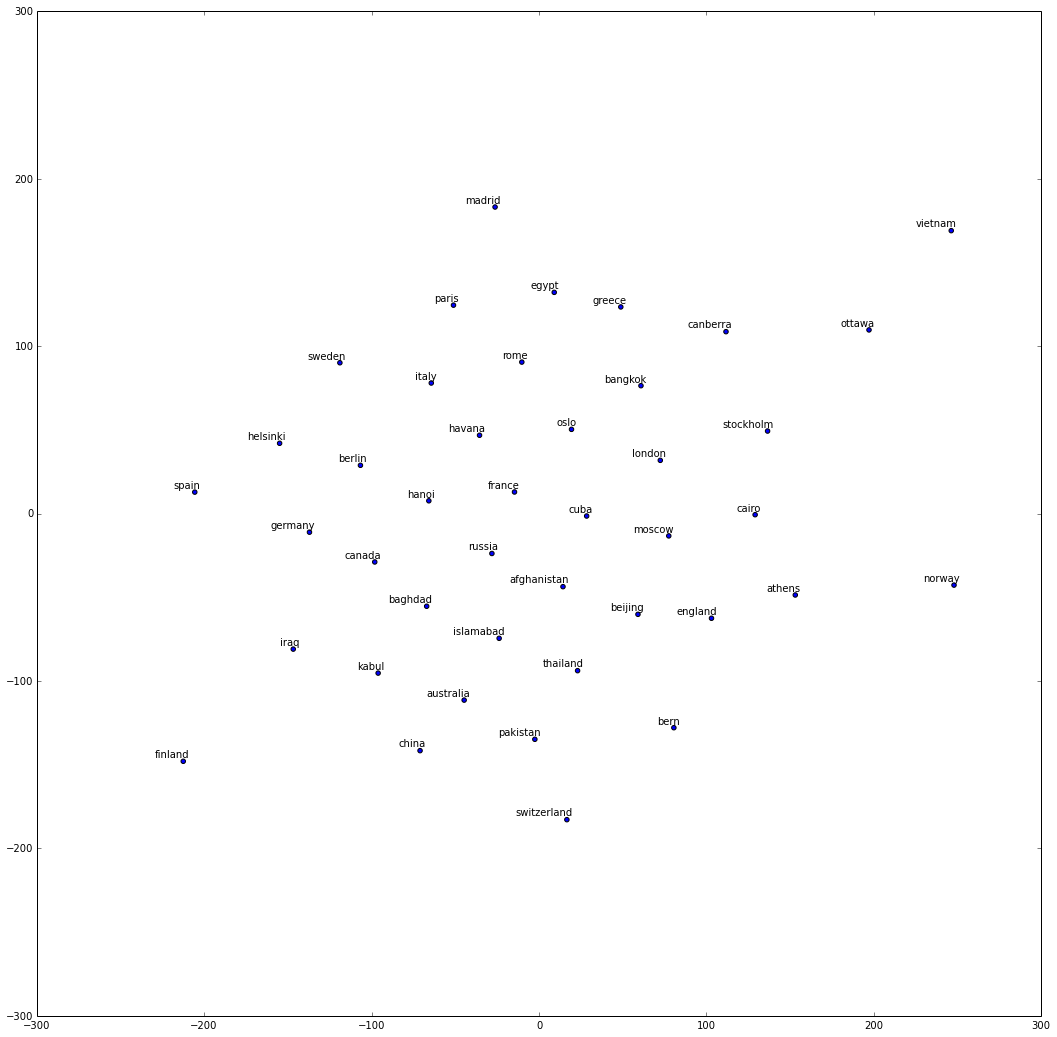

In [8]:
%matplotlib inline
#二：画图展示
#tmp_ids = np.random.randint(0, analogy_questions.shape[0], size = [20])
word_ids = np.asarray(list(set(analogy_questions[:20].flatten())))
word_embs = word_vecs[word_ids]
labels = [words[i] for i in word_ids]

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
low_dim_embs = tsne.fit_transform(word_embs)
plot_with_labels(low_dim_embs, labels)